# <span style="color:#bcff8f">Survival Analysis</span>

<span style="font-size:12pt;color:gray;font-weight:bold"> Patrick Weatherford</span><br>



***

## <span style="color:#c58fff">Import Libraries</span>

In [6]:
x=5



(100, 225, 325, 550)

In [14]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lifelines as sm
from lifelines.plotting import plot_lifetimes as lifeplot
import lifelines.datasets as life_data
from lifelines import NelsonAalenFitter as ll_naf
from lifelines import KaplanMeierFitter as ll_kmf


***

## <span style="color:#c58fff">Important Terms</span>

- <u>Survival Analysis</u>: Analyzing the time between a start event and end event.

- <u>Survival Functions</u>: The probability that a column representing durations has a value greater than time ($t$)<br> 
    - $S(t)=$
        - $P(T \geq t)$
        - $\int_{t}^{\infty }f(t')dt'$
        - $1-CDF(t)$


- <u>Hazard Function</u>: For observation with durations greater than $t$, is the rate at which survival decrease from $t$ to $\Delta{t}$ 
    - $h(t)\ |\ \lambda{t}=$
        - $\frac{1}{S(t)}\lim_{\Delta{t}\rightarrow 0}\frac{S(t)-S(t+\Delta{t})}{\Delta{t}]}$
        - $\frac{f(t)}{S(t)}$
        - $-\frac{S'(t)}{S(t)}$


        
- <u>Cumulative Hazard Function</u>: 
    - Standard:
        - $S(t)=e^{-\int_{0}^{t}HAZ*\Delta{HAZ}}$
        - $e^{-H(t)}$
    - Cox model:
        - $H(t|X)=e^{x^{\gamma\beta}}\int_{0}^{t_0}HAZ*\Delta{HAZ}$
        - $e^{x^{\gamma\beta}}H_0(t)$


- <u>Censoring</u>: Taking into account observations where one of the events is known but not all. It is important to take these into consideration because not doing so will make the model biased and prone to error.
    - <u>Right-Censored</u> if end event happened after censor time.
        - $RCensored=\left\{\begin{matrix}1, & if\ T_i\leq C_i \\ 0, & if\ T_i> C_i\end{matrix}\right.$
        
    - <u>Left-Censored</u> if end event happend before start time.
        - $LCensored=\left\{\begin{matrix}1, & if\ T_i\geq C_i \\ 0, & if\ T_i< C_i\end{matrix}\right.$

***

## <span style="color:#c58fff">Survival Analysis Example</span>


### Why not including censored data is bad

- Underestimates the actual duration.

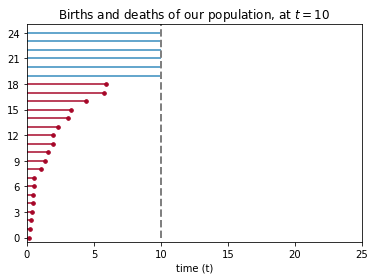

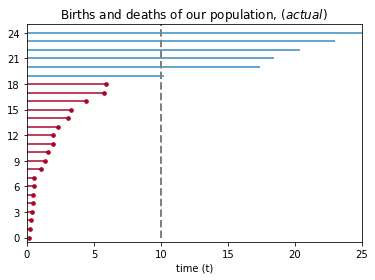

In [4]:
## sample size
n = 25

## date when hypothetical study stopped
current_time = 10

## create random lifetimes with instances where data is right censored (aka lifetime greater than date when study stopped)
actual_lifetimes = np.asarray([
    np.random.exponential(scale=12) if (np.random.uniform() < 0.5) else np.random.exponential(2) for i in range(n)
])

## if lifetime greater than study stop time, end at that date
observed_lifetimes = np.minimum(actual_lifetimes, current_time)

## True if data is not censored (death observed), False if data is right-censored (death occurred after study stop date)
deaths_observed = actual_lifetimes < current_time

## plot results and cutoff at study stop 
ax = lifeplot(durations=observed_lifetimes, event_observed=deaths_observed)
ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--', color='grey')
ax.set_xlabel("time (t)")
ax.set_title('Births and deaths of our population, at $t=10$')
plt.show()

## plot results and do NOT cutoff at study stop
ax = lifeplot(durations=actual_lifetimes, event_observed=deaths_observed)
ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--', color='grey')
ax.set_xlabel("time (t)")
ax.set_title('Births and deaths of our population, $(actual)$')
plt.show()

*As you can see, if you cutoff at the study stop time, or even worse, exclude censored data altogether, your result can be greatly underestimated*

<br>

### Visualizing Hazard & Cumulative Hazard

In [5]:
## import dataset
df = life_data.load_dd()
df.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


AttributeError: 'NelsonAalenFitter' object has no attribute 'survival_function_'

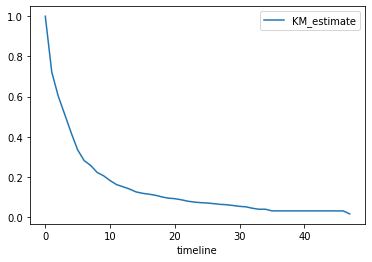

In [20]:
T = df['duration']
E = df['observed']

kmf = ll_kmf()
naf = ll_naf()

kmf.fit(T, event_observed=E)

kmf.survival_function_.plot()

plt.show()

In [7]:
haz_df1 = haz.hazard_at_times

haz_df1

<bound method UnivariateFitter.hazard_at_times of <lifelines.NelsonAalenFitter:"NA_estimate", fitted with 1808 total observations, 340 right-censored observations>>

In [8]:
data9 = np.random.normal(size=1000)

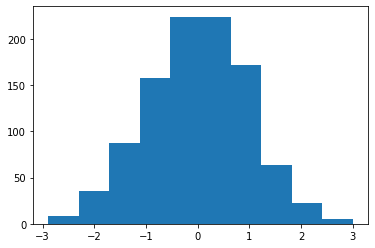

In [9]:
plt.hist(data9, bins=10)
plt.show()

In [10]:
mean = data9.mean()
std = data9.std()

mean, std

(-0.0023465082708123857, 0.9726892037985488)

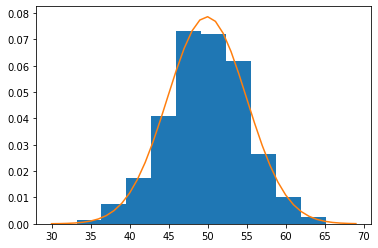

In [11]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

sample = np.random.normal(loc=50, scale=5, size=1000)
samp_mean = sample.mean()
samp_std = sample.std()

## define distribution function
dist = stats.norm(samp_mean, samp_std)

xs = [x for x in range(30, 70)]
pdfs = [dist.pdf(x) for x in xs]

plt.hist(sample, bins=10, density=True)
plt.plot(xs, pdfs)
plt.show()

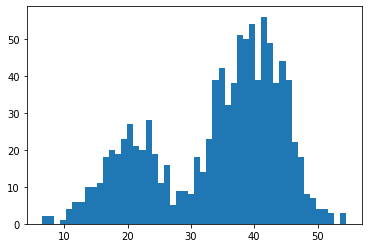

In [12]:
samp1 = np.random.normal(loc=20, scale=5, size=300)
samp2 = np.random.normal(loc=40, scale=5, size=700)
sample = np.hstack((samp1, samp2))

plt.hist(sample, bins=50)
plt.show()

In [13]:
from sklearn.neighbors import KernelDensity as kde

bw = 2

kde_model = kde(bandwidth=bw, kernel='gaussian')
sample = sample.reshape((len(sample)), 1)
kde_model.fit(sample)

xs = np.asarray([x for x in range(1, 60)])
xs = xs.reshape(xs.size, 1)
pdfs = kde_model.score_samples(xs)
pdfs = np.exp(pdfs)

plt.hist(sample, bins=50, density=True)
plt.plot(xs[:], pdfs)
plt.show()

ModuleNotFoundError: No module named 'sklearn'